# Electrical Fault detection

We have to predict faults in a power system.

In [ ]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('detect_dataset.csv')

In [ ]:
data.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


# Performing basic EDA

In [ ]:
data.shape

(12001, 9)

In [ ]:
data.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [ ]:
print('dataset length:',len(data))

dataset length: 12001


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [ ]:
data.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [ ]:
data.isnull().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [ ]:
# looping through datatset to find count of unique values of each column
for x in data.columns:
  print(x,':',len(data[x].unique()))


Output (S) : 2
Ia : 12001
Ib : 12001
Ic : 12001
Va : 11996
Vb : 11813
Vc : 11987
Unnamed: 7 : 1
Unnamed: 8 : 1


In [ ]:
data.drop(['Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

In [ ]:
data.head(2)

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.05449,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.10200,-0.628612,0.526202


In [ ]:
# Let's check total number of fault and no-fault instances
data['Output (S)'].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

# Let's plot Correlation Matrix

In [ ]:
corr=data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.00,0.04,-0.13,0.12,-0.04,0.01,0.02
Ia,0.04,1.00,-0.38,-0.28,0.03,-0.16,0.13
Ib,-0.13,-0.38,1.00,-0.53,-0.03,0.03,-0.01
Ic,0.12,-0.28,-0.53,1.00,-0.00,-0.10,0.10
Va,-0.04,0.03,-0.03,-0.00,1.00,-0.51,-0.47
Vb,0.01,-0.16,0.03,-0.10,-0.51,1.00,-0.52
Vc,0.02,0.13,-0.01,0.10,-0.47,-0.52,1.00


# Histogram

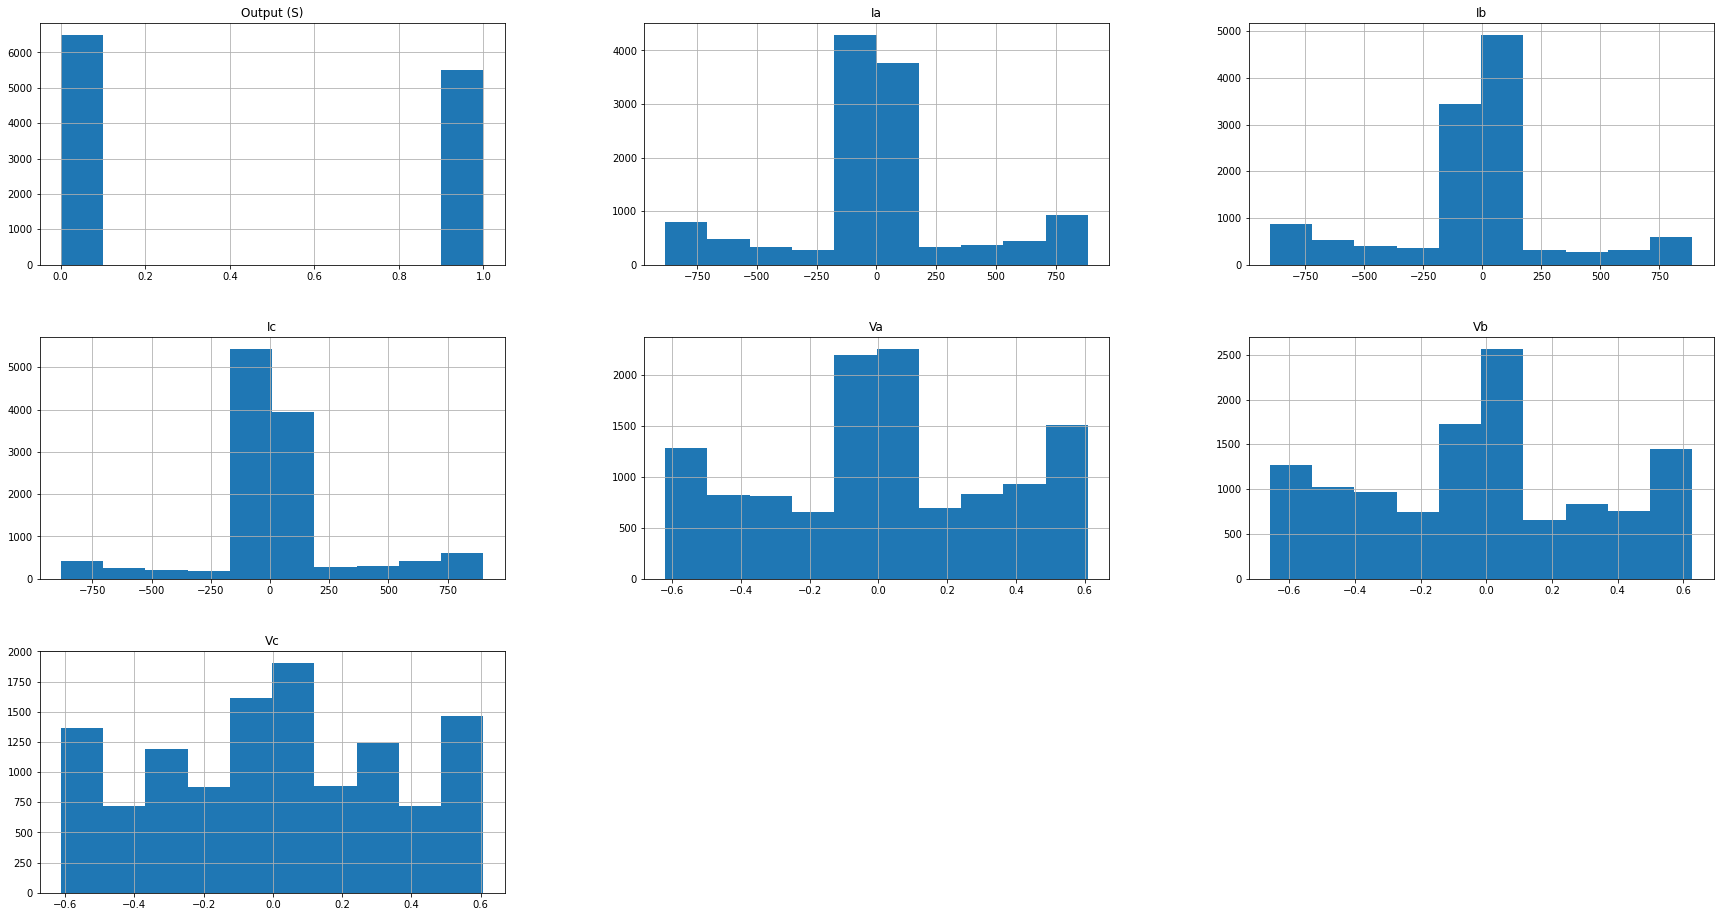

In [ ]:
data.hist(figsize=(30,16))
plt.show()

### Count plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


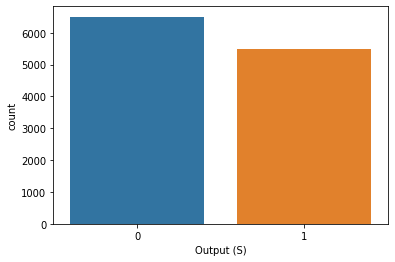

In [ ]:
sns.countplot(data['Output (S)'])
plt.show()

# Box plot

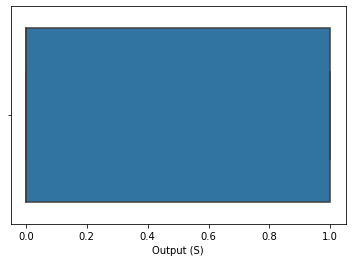

In [ ]:
sns.boxplot(x=data['Output (S)'])
plt.show()

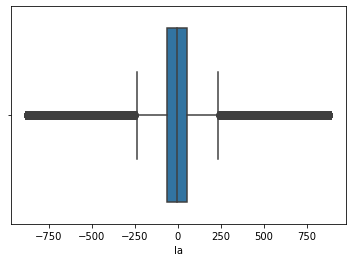

In [ ]:
sns.boxplot(x=data['Ia'])
plt.show()

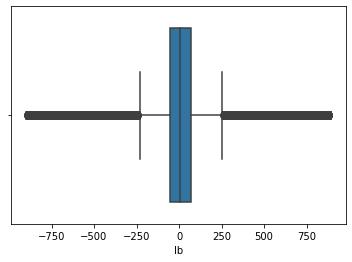

In [ ]:
 sns.boxplot(x=data['Ib'])
plt.show()

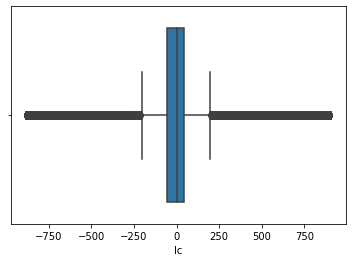

In [ ]:
sns.boxplot(x=data['Ic'])
plt.show()

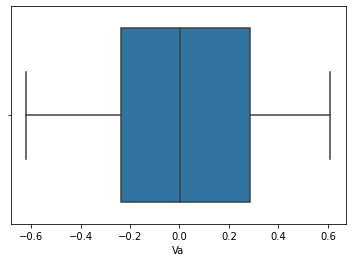

In [ ]:
sns.boxplot(x=data['Va'])
plt.show()

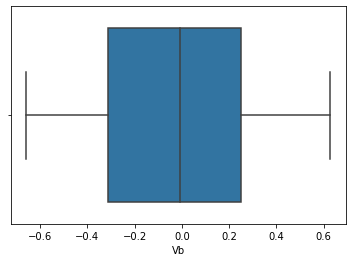

In [ ]:
sns.boxplot(x=data['Vb'])
plt.show()

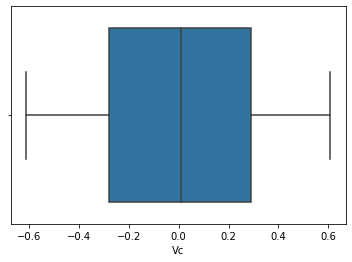

In [ ]:
sns.boxplot(x=data['Vc'])
plt.show()

We can notice that dataset is balanced and not skewed in nature

# Dendrogram

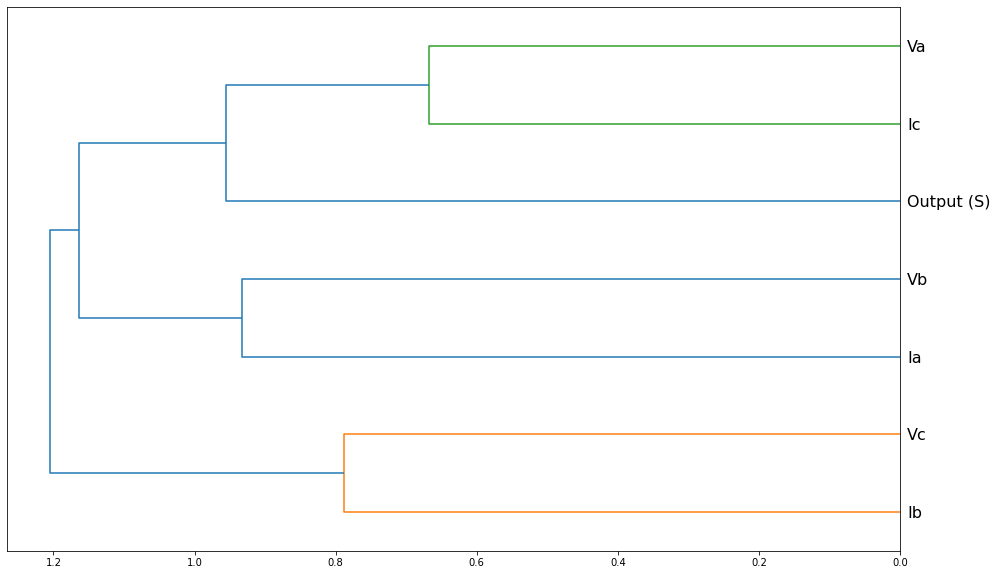

In [ ]:
# Plotting a Dendrogram on the columns of the dataset
X = data.dropna()
# droping the NaN values
import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(X).correlation,4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed,method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()


# Preprocessing, Modeling and prediction on test data

In [ ]:
##Let's Split the labels and the target
X=data.drop(['Output (S)'],axis=1)
y=data['Output (S)']
#checking the shape 
print(X.shape,y.shape)

(12001, 6) (12001,)


In [ ]:
# importing train test split and Splitting into training (80%) and testing set (20%)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape, y_train.shape)

print(X_test.shape,y_test.shape)

(9600, 6) (9600,)
(2401, 6) (2401,)


### Scaling

In [ ]:
# importing min max scalar
from sklearn.preprocessing import MinMaxScaler

scaled=MinMaxScaler()

X_train=scaled.fit_transform(X_train)

X_test=scaled.fit_transform(X_test)

In [ ]:
# Defining a function to visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df],axis=0,ignore_index=True)
    


    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
    .sum()[['feature_importance']]\
    .sort_values('feature_importance',ascending=False).index[:50]
    # plotting feature importance data using boxenplot
    fig, ax =plt.subplots(figsize=(8,max(6,len(order)*.25)))
    sns.boxenplot(data=feature_importance_df,
                  x='feature_importance',
                  y='column',
                  order=order,
                  ax=ax,
                  palette='viridis',
                  orient='h')
    ax.tick_params(axis='x',rotation=0)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    
    return fig, ax

In [ ]:
import sklearn.metrics as metrics

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

## LogisticRegression

accuracy score: 0.734277384423157
precision score: 0.41735159817351597
recall score: 1.0
[[1306  638]
 [   0  457]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 282 ms, sys: 244 ms, total: 526 ms
Wall time: 463 ms


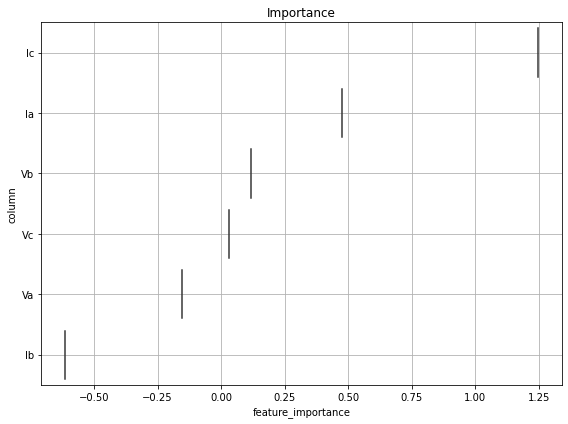

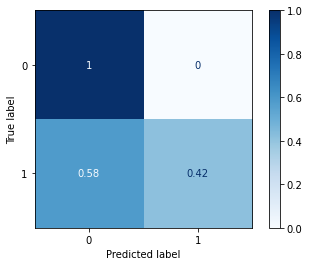

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression

log_class=LogisticRegression()

log_class.fit(X_train,y_train)

#predicting on test data
y_pred_log=log_class.predict(X_test)

print('accuracy score:',accuracy_score(y_pred_log,y_test))
print('precision score:',precision_score(y_pred_log,y_test))
print('recall score:',recall_score(y_pred_log,y_test))
print(confusion_matrix(y_pred_log,y_test))
# visualizing importance of features
fig, ax = visualize_importance(log_class.coef_[0],X)

# for displaying confusion matrix
disp=metrics.plot_confusion_matrix(log_class,X_test,y_test,cmap=plt.cm.Blues,normalize='true')

## RandomForestClassifier

accuracy score: 0.9966680549770929
precision score: 0.9963470319634703
recall score: 0.9963470319634703
[[1302    4]
 [   4 1091]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


CPU times: user 3.16 s, sys: 117 ms, total: 3.28 s
Wall time: 3.2 s


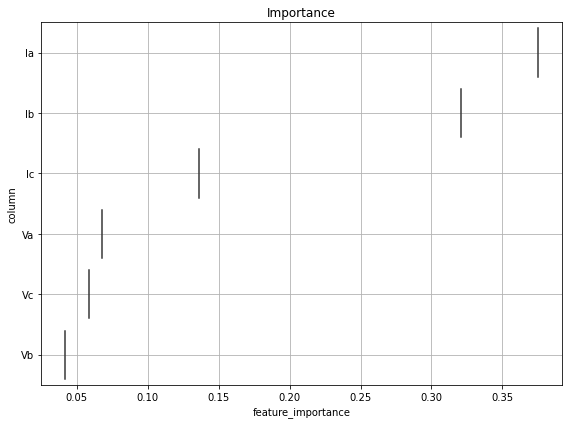

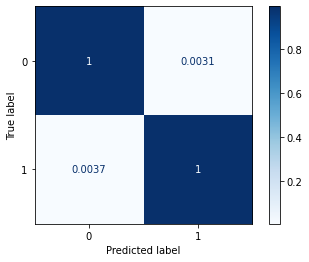

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=200,max_depth=40)

rf_clf.fit(X_train,y_train)

y_preds_rf=rf_clf.predict(X_test)

print('accuracy score:',accuracy_score(y_preds_rf,y_test))
print('precision score:',precision_score(y_preds_rf,y_test))
print('recall score:',recall_score(y_preds_rf,y_test))
print(confusion_matrix(y_preds_rf,y_test))

fig, ax = visualize_importance(rf_clf.feature_importances_,X)

disp=metrics.plot_confusion_matrix(rf_clf,X_test,y_test,cmap=plt.cm.Blues,normalize='true')


## DecisionTreeClassifier

accuracy score: 0.9966680549770929
precision score: 0.9990867579908675
recall score: 0.9936421435059037
[[1299    1]
 [   7 1094]]
CPU times: user 207 ms, sys: 51.4 ms, total: 258 ms
Wall time: 203 ms


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


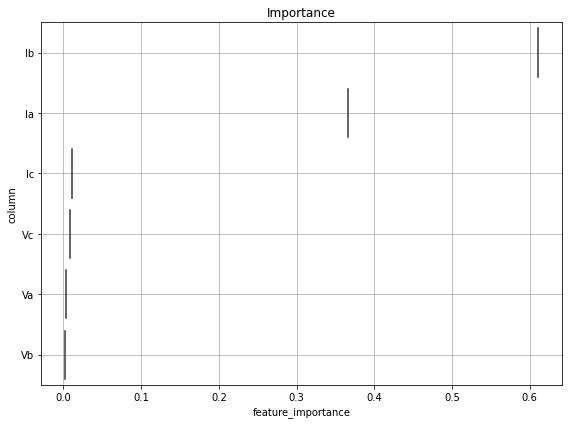

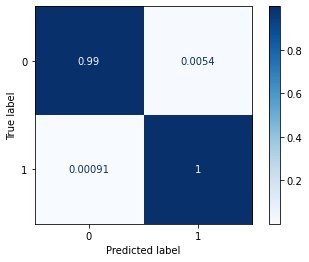

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier()

dt_clf.fit(X_train,y_train)

y_preds_dt=dt_clf.predict(X_test)

print('accuracy score:',accuracy_score(y_preds_dt,y_test))
print('precision score:',precision_score(y_preds_dt,y_test))
print('recall score:',recall_score(y_preds_dt,y_test))
print(confusion_matrix(y_preds_dt,y_test))

fig, ax = visualize_importance(dt_clf.feature_importances_,X)

disp=metrics.plot_confusion_matrix(dt_clf,X_test,y_test,cmap=plt.cm.Blues,normalize='true')

## GradientBoostingClassifier

accuracy score: 0.9941690962099126
precision score: 0.9899543378995433
recall score: 0.9972401103955841
[[1303   11]
 [   3 1084]]
CPU times: user 2.45 s, sys: 56.5 ms, total: 2.5 s
Wall time: 2.44 s


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


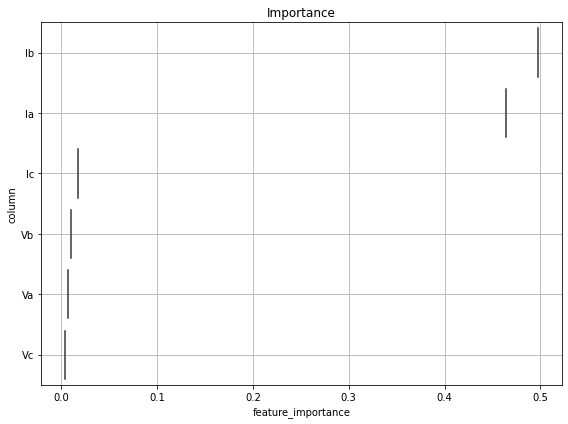

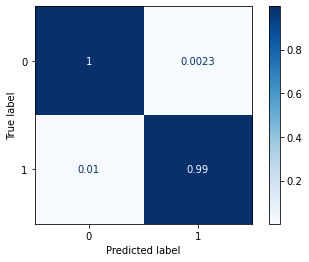

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

GBR_clf=GradientBoostingClassifier()

GBR_clf.fit(X_train,y_train)

y_preds_GBR=GBR_clf.predict(X_test)

print('accuracy score:',accuracy_score(y_preds_GBR,y_test))
print('precision score:',precision_score(y_preds_GBR,y_test))
print('recall score:',recall_score(y_preds_GBR,y_test))
print(confusion_matrix(y_preds_GBR,y_test))

fig, ax = visualize_importance(GBR_clf.feature_importances_,X)

disp=metrics.plot_confusion_matrix(GBR_clf,X_test,y_test,cmap=plt.cm.Blues,normalize='true')

##Performing Hyper parameter tuning using RandomizedSearchCV

In [ ]:

def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)

  random.fit(X_train,y_train)
  random.best_params_

In [ ]:
%%time
# for random forest classifier
# creating parameters dictionary for tuning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train,y_train,param_grid=rf_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
CPU times: user 1.23 s, sys: 69.8 ms, total: 1.3 s
Wall time: 14.2 s


### working with best model

In [ ]:
# printing Area under ROC of Model On Test Set
score=metrics.roc_auc_score(y_test,y_preds_rf)
print(f'Area under ROC of Model on Test Set-{score:,.2%}')


Area under ROC of Model on Test Set-99.66%


In [ ]:
# storing the predicted result in a dataframe
predictions=pd.DataFrame(y_preds_rf)

In [ ]:
predictions.head()

,0
0,0
1,1
2,0
3,0
4,0


# Conclusion

According to this model, the predicted value we got, matches with the actual target values. The model is performing well.  We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning and did prediction.